In [26]:
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence, text
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, Bidirectional
import tensorflow as tf

In [27]:
from keras.datasets import imdb

num_words = 10000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=num_words)

In [29]:
#convert the text data to numerical form 
#make the lengths of the texts equal by padding. If a sentence is having a length greater than 200 
#it will be trimmed off otherwise it will be padded by 0.

max_len =200
x_train= sequence.pad_sequences(x_train, maxlen=max_len)
x_test=sequence.pad_sequences(x_test, maxlen=max_len)
y_test=np.array(y_test)
y_train=np.array(y_train) 

In [30]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=128
model=Sequential()
model.add(Embedding(num_words, embedding_size,input_length=max_len))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1330465 (5.08 MB)
Trainable params: 1330

In [31]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [32]:
batch_size=64
epochs=5

model_RNN=model.fit(x_train,y_train,
          validation_split=0.2,
          batch_size=batch_size,
          epochs=epochs
          )

Epoch 1/5


2023-06-16 09:14:52.025769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-16 09:14:52.234763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-16 09:14:52.603259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.4559 - accuracy: 0.7853

2023-06-16 09:15:07.056444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-16 09:15:07.141862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 17s 50ms/step - loss: 0.4559 - accuracy: 0.7853 - val_loss: 0.3495 - val_accuracy: 0.8656
Epoch 2/5
313/313 [==============================] - 14s 45ms/step - loss: 0.2487 - accuracy: 0.9053 - val_loss: 0.3335 - val_accuracy: 0.8636
Epoch 3/5
313/313 [==============================] - 14s 43ms/step - loss: 0.1768 - accuracy: 0.9360 - val_loss: 0.3637 - val_accuracy: 0.8632
Epoch 4/5
313/313 [==============================] - 13s 43ms/step - loss: 0.1315 - accuracy: 0.9525 - val_loss: 0.4142 - val_accuracy: 0.8526
Epoch 5/5
313/313 [==============================] - 13s 40ms/step - loss: 0.1100 - accuracy: 0.9621 - val_loss: 0.4653 - val_accuracy: 0.8644


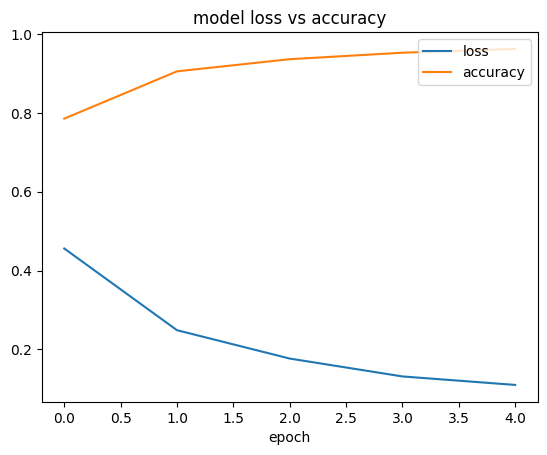

In [33]:
from matplotlib import pyplot

pyplot.plot(model_RNN.history['loss'])
pyplot.plot(model_RNN.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()

In [34]:
loss, acc = model.evaluate(x_test,y_test)
print(f'Test loss: {loss},Test accuracy= {acc}')

782/782 [==============================] - 10s 13ms/step - loss: 0.4819 - accuracy: 0.8536
Test loss: 0.48190540075302124,Test accuracy= 0.8536400198936462


In [ ]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer

# Load the IMDb dataset
word_index = imdb.get_word_index()  # Get the word index mapping

# Reverse the word index mapping: key -> words, index -> value
reverse_word_index = {index: word for word, index in word_index.items()}

# Decode a sequence of indices to text
def decode_sequence(sequence):
    decoded_words = [reverse_word_index.get(index-3, '') for index in sequence]
    return ' '.join(decoded_words)

# Example usage
review_indices = x_train[0] 
review_text = decode_sequence(review_indices)

print("Review Text:", review_text)

In [129]:
prediction = model.predict(x_train)


782/782 [==============================] - 10s 12ms/step


In [130]:
i=0
# Interpret the prediction
if prediction[i] > 0.5:
    sentiment = "Positive"
else:
    sentiment = "Negative"

print(prediction[i])
print("Sentiment:", sentiment)

[0.9990669]
Sentiment: Positive


In [126]:
new_data = ["This is what a true masterpiece looks like.",
            "This movie is really really bad."]
#encode strings -> numerical numpy arrs
tokenizer= text.Tokenizer()
tokenizer.fit_on_texts(new_data)
sequences=tokenizer.texts_to_sequences(new_data)
new_data_sequence= sequence.pad_sequences(sequences=sequences,maxlen=max_len)
print(new_data_sequence)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  2  4  5  6  7  8  9]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0 

In [127]:
# Print the predictions
for i, review in enumerate(new_data):
    prediction = model.predict(new_data_sequence)
    print(prediction[i])
    print(f"Review: {review}")
    print(f"Prediction: {'Posit ive' if prediction[i] > 0.5 else 'Negative'}")
    print()

1/1 [==============================] - 0s 126ms/step
[0.660823]
Review: This is what a true masterpiece looks like.
Prediction: Positive

1/1 [==============================] - 0s 17ms/step
[0.4442961]
Review: This movie is really really bad.
Prediction: Negative



In [104]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        ans=''
        for i in range(len(s)):
            ans=max(ans,expand(s,i,i), expand(s,i,i+1), key=len)
        return ans
            
def expand(s,i,j):
    while i>=0 and j<len(s) and s[i]==s[j]:
        i-=1
        j+=1
    return s[i+1:j]

s = "bbbd"
a = Solution()
print(a.longestPalindrome(s))

bbb


In [102]:
class Solution:
    def longestPalindrome(self, s):
        if len(s) < 2:
            return list(s)

        start = 0
        end = 0

        for i in range(len(s)):
            len1 = self.expandFromCenter(s, i, i)   # Check for odd-length palindromes
            len2 = self.expandFromCenter(s, i, i + 1)   # Check for even-length palindromes
            length = max(len1, len2)

            if length > end - start:
                start = i - (length - 1) // 2
                end = i + length // 2

        return list(s[start:end+1])

    def expandFromCenter(self, s, left, right):
        while left >= 0 and right < len(s) and s[left] == s[right]:
            left -= 1
            right += 1

        return right - left - 1


s = "bbbd"
a = Solution()
print(a.longestPalindrome(s))


IndexError: string index out of range

In [ ]:
lst=[]
lst_=['a','b','c']
for i in range(-1,1):
    print(lst[i])

In [108]:
print(list(range(3,1)))

[]


In [23]:
class Solution:
    def expand(self,s,left,right):
        mid=(left+right)//2
        if left == right:
            left-=1
            right+=1
        set_=[s[mid]]
        while left >= 0 and right<len(s) and s[left]!=s[right] and s[left] not in set_ and s[right] not in set_:
            left-=1
            right+=1
            set_.append(s[left])
            set_.append(s[right])
        return right-left-1
    
    def lengthOfLongestSubstring(self, s):
        if len(set(s))==len(s):
            
            return len(s)
        elif len(s)<3 or len(set(s))==1:
            return 1
        else:
            length_max=0
            for i in range(len(s)):
                
                length_curr=self.expand(s,i,i)
                if length_max<length_curr:
                    length_max=length_curr
                
        return length_max

a=Solution()
s="pwwkew"
print(a.lengthOfLongestSubstring(s))

IndexError: string index out of range